In [410]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import math
import seaborn as sns


In [411]:
# Jupyter configuration
pd.set_option('display.max_rows', 500)
%matplotlib inline

In [412]:
all_countries_dataset = pd.read_csv('all_countries_dataset.csv')

In [428]:
all_countries_dataset.columns.tolist()

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

In [413]:
# drop cloumn Unnamed: 0

if 'Unnamed: 0' in all_countries_dataset.columns:
    all_countries_dataset = all_countries_dataset.drop(columns=['Unnamed: 0'])

# Fixing date column datatype
all_countries_dataset['date'] = pd.to_datetime(all_countries_dataset['date']);
all_countries_dataset['location'] = all_countries_dataset['location'].astype('category');
all_countries_dataset['continent'] = all_countries_dataset['continent'].astype('category');

# all_countries_dataset.set_index('date', inplace=True)


In [414]:
start_date = all_countries_dataset["date"].min()
end_date =  all_countries_dataset["date"].max()

delta_time = end_date - start_date
delta_time

Timedelta('670 days 00:00:00')

In [415]:
def plot_data_in_time(dataset):
    for column in dataset.columns:
        if dataset[column].dtype != 'float64':
            continue
        dataset.plot(kind='line', x='date', y=column, figsize=(10, 2));
    plt.show()

### Countries with total cases < 2% of population

In [416]:
all_continents = all_countries_dataset['continent'].unique()

countries_to_exclude = []
treashold_population_infected_percentage = 2

for continent in all_continents:
    max_percentage = 0
    min_percentage = 100
    
    print("==== Continent: {} ====".format(continent))
    
    for index, row in all_countries_dataset.iterrows():
        if row['continent'] == continent and row['date'] == end_date and not pd.isna(row['population']) and not pd.isna(row['total_cases']):
            percentage_population_infected = row['total_cases'] / row['population'] * 100

            max_percentage = max(percentage_population_infected, max_percentage)
            min_percentage = min(percentage_population_infected, min_percentage)

            print("{} - {} - {} - {}".format(row['location'], row['total_cases'], row['population'], percentage_population_infected))

            if percentage_population_infected < treashold_population_infected_percentage:
                countries_to_exclude.append(row['location'])

    print("Max: {}".format(max_percentage))
    print("Min: {}".format(min_percentage))
    
    print("\n")


==== Continent: Asia ====
Afghanistan - 156284.0 - 39835428.0 - 0.39232413920593495
Armenia - 309397.0 - 2968128.0 - 10.423977672121957
Azerbaijan - 532570.0 - 10223344.0 - 5.2093522432581745
Bahrain - 276874.0 - 1748295.0 - 15.836800997543321
Bangladesh - 1569753.0 - 166303494.0 - 0.9439086108437386
Bhutan - 2621.0 - 779900.0 - 0.336068726759841
Brunei - 13246.0 - 441532.0 - 3.000009059366026
Cambodia - 118613.0 - 16946446.0 - 0.6999284687774652
China - 97391.0 - 1444216102.0 - 0.006743519883563797
Georgia - 721388.0 - 3979773.0 - 18.126360473323476
Hong Kong - 12347.0 - 7552800.0 - 0.16347579705539667
India - 34296237.0 - 1393409033.0 - 2.4613186930588817
Indonesia - 4244761.0 - 276361788.0 - 1.5359435292117882
Iran - 5934495.0 - 85028760.0 - 6.979397323917224
Iraq - 2056401.0 - 41179351.0 - 4.993767385989158
Israel - 1328218.0 - 8789776.0 - 15.110942531413771
Japan - 1723645.0 - 126050796.0 - 1.3674209562310102
Jordan - 864661.0 - 10269022.0 - 8.420091027168898
Kazakhstan - 1021452.

In [417]:
print("The countries to exclude are: {}".format(countries_to_exclude))
print("\n")
print("The number of countries to exclude: {}".format(len(countries_to_exclude)))

The countries to exclude are: ['Afghanistan', 'Bangladesh', 'Bhutan', 'Cambodia', 'China', 'Hong Kong', 'Indonesia', 'Japan', 'Laos', 'Myanmar', 'Pakistan', 'Saudi Arabia', 'South Korea', 'Syria', 'Taiwan', 'Tajikistan', 'Timor', 'Uzbekistan', 'Vietnam', 'Yemen', 'Algeria', 'Angola', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo', "Cote d'Ivoire", 'Democratic Republic of Congo', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mauritius', 'Mozambique', 'Niger', 'Nigeria', 'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Uganda', 'Zambia', 'Zimbabwe', 'El Salvador', 'Haiti', 'Nicaragua', 'Venezuela', 'Australia', 'Kiribati', 'Marshall Islands', 'Micronesia (country)', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa

In [418]:
print("All available countrie: {}".format(len(all_countries_dataset['location'].unique())))

valid_countries_data = all_countries_dataset[~all_countries_dataset['location'].isin(countries_to_exclude)]

print("Romanining valid countries: {}".format(len(valid_countries_data['location'].unique())))


All available countrie: 224
Romanining valid countries: 144


### Calculate var coverage for each country and select variable that have a mean coverage less than a threshold

In [419]:
var_cov_threshold = 50
var_to_exclude = []

def var_coverage():
    countries = valid_countries_data['location'].unique()
    variables = valid_countries_data.columns

    for variable in variables:
        if valid_countries_data[variable].dtype != 'float64':
            continue
        var_cov_percentage_sum = 0
        print("======= {} =======".format(variable))
        for country in countries:
            country_data = valid_countries_data[valid_countries_data['location'] == country]
            all_rows = country_data.shape[0]
            nans = country_data[variable].isna().sum()
            nans_percentage = (nans / all_rows) * 100
            var_coverage_percentage = 100 - nans_percentage
            var_cov_percentage_sum = var_cov_percentage_sum + var_coverage_percentage
            print("{} = {:.2f}%".format(country, var_coverage_percentage))
        var_cov_mean = var_cov_percentage_sum / len(countries)
        if var_cov_mean < var_cov_threshold and 'vacc' not in variable:
            var_to_exclude.append(variable)
        print("===== Var cov mean for {} = {:.2f}%".format(variable, var_cov_mean))
        print("\n")

#var_coverage()

In [420]:
print("The variables to exclude are: {}".format(var_to_exclude))
print("Number of variables to exlude {}".format(len(var_to_exclude)))

The variables to exclude are: []
Number of variables to exlude 0


In [421]:
remaining_variables = valid_countries_data.columns.drop(var_to_exclude)
valid_countries_data = valid_countries_data[remaining_variables]

### Fill nan for the remaining variables 

In [422]:
# ...

### Calculate correlations between the remaining variables

<AxesSubplot:>

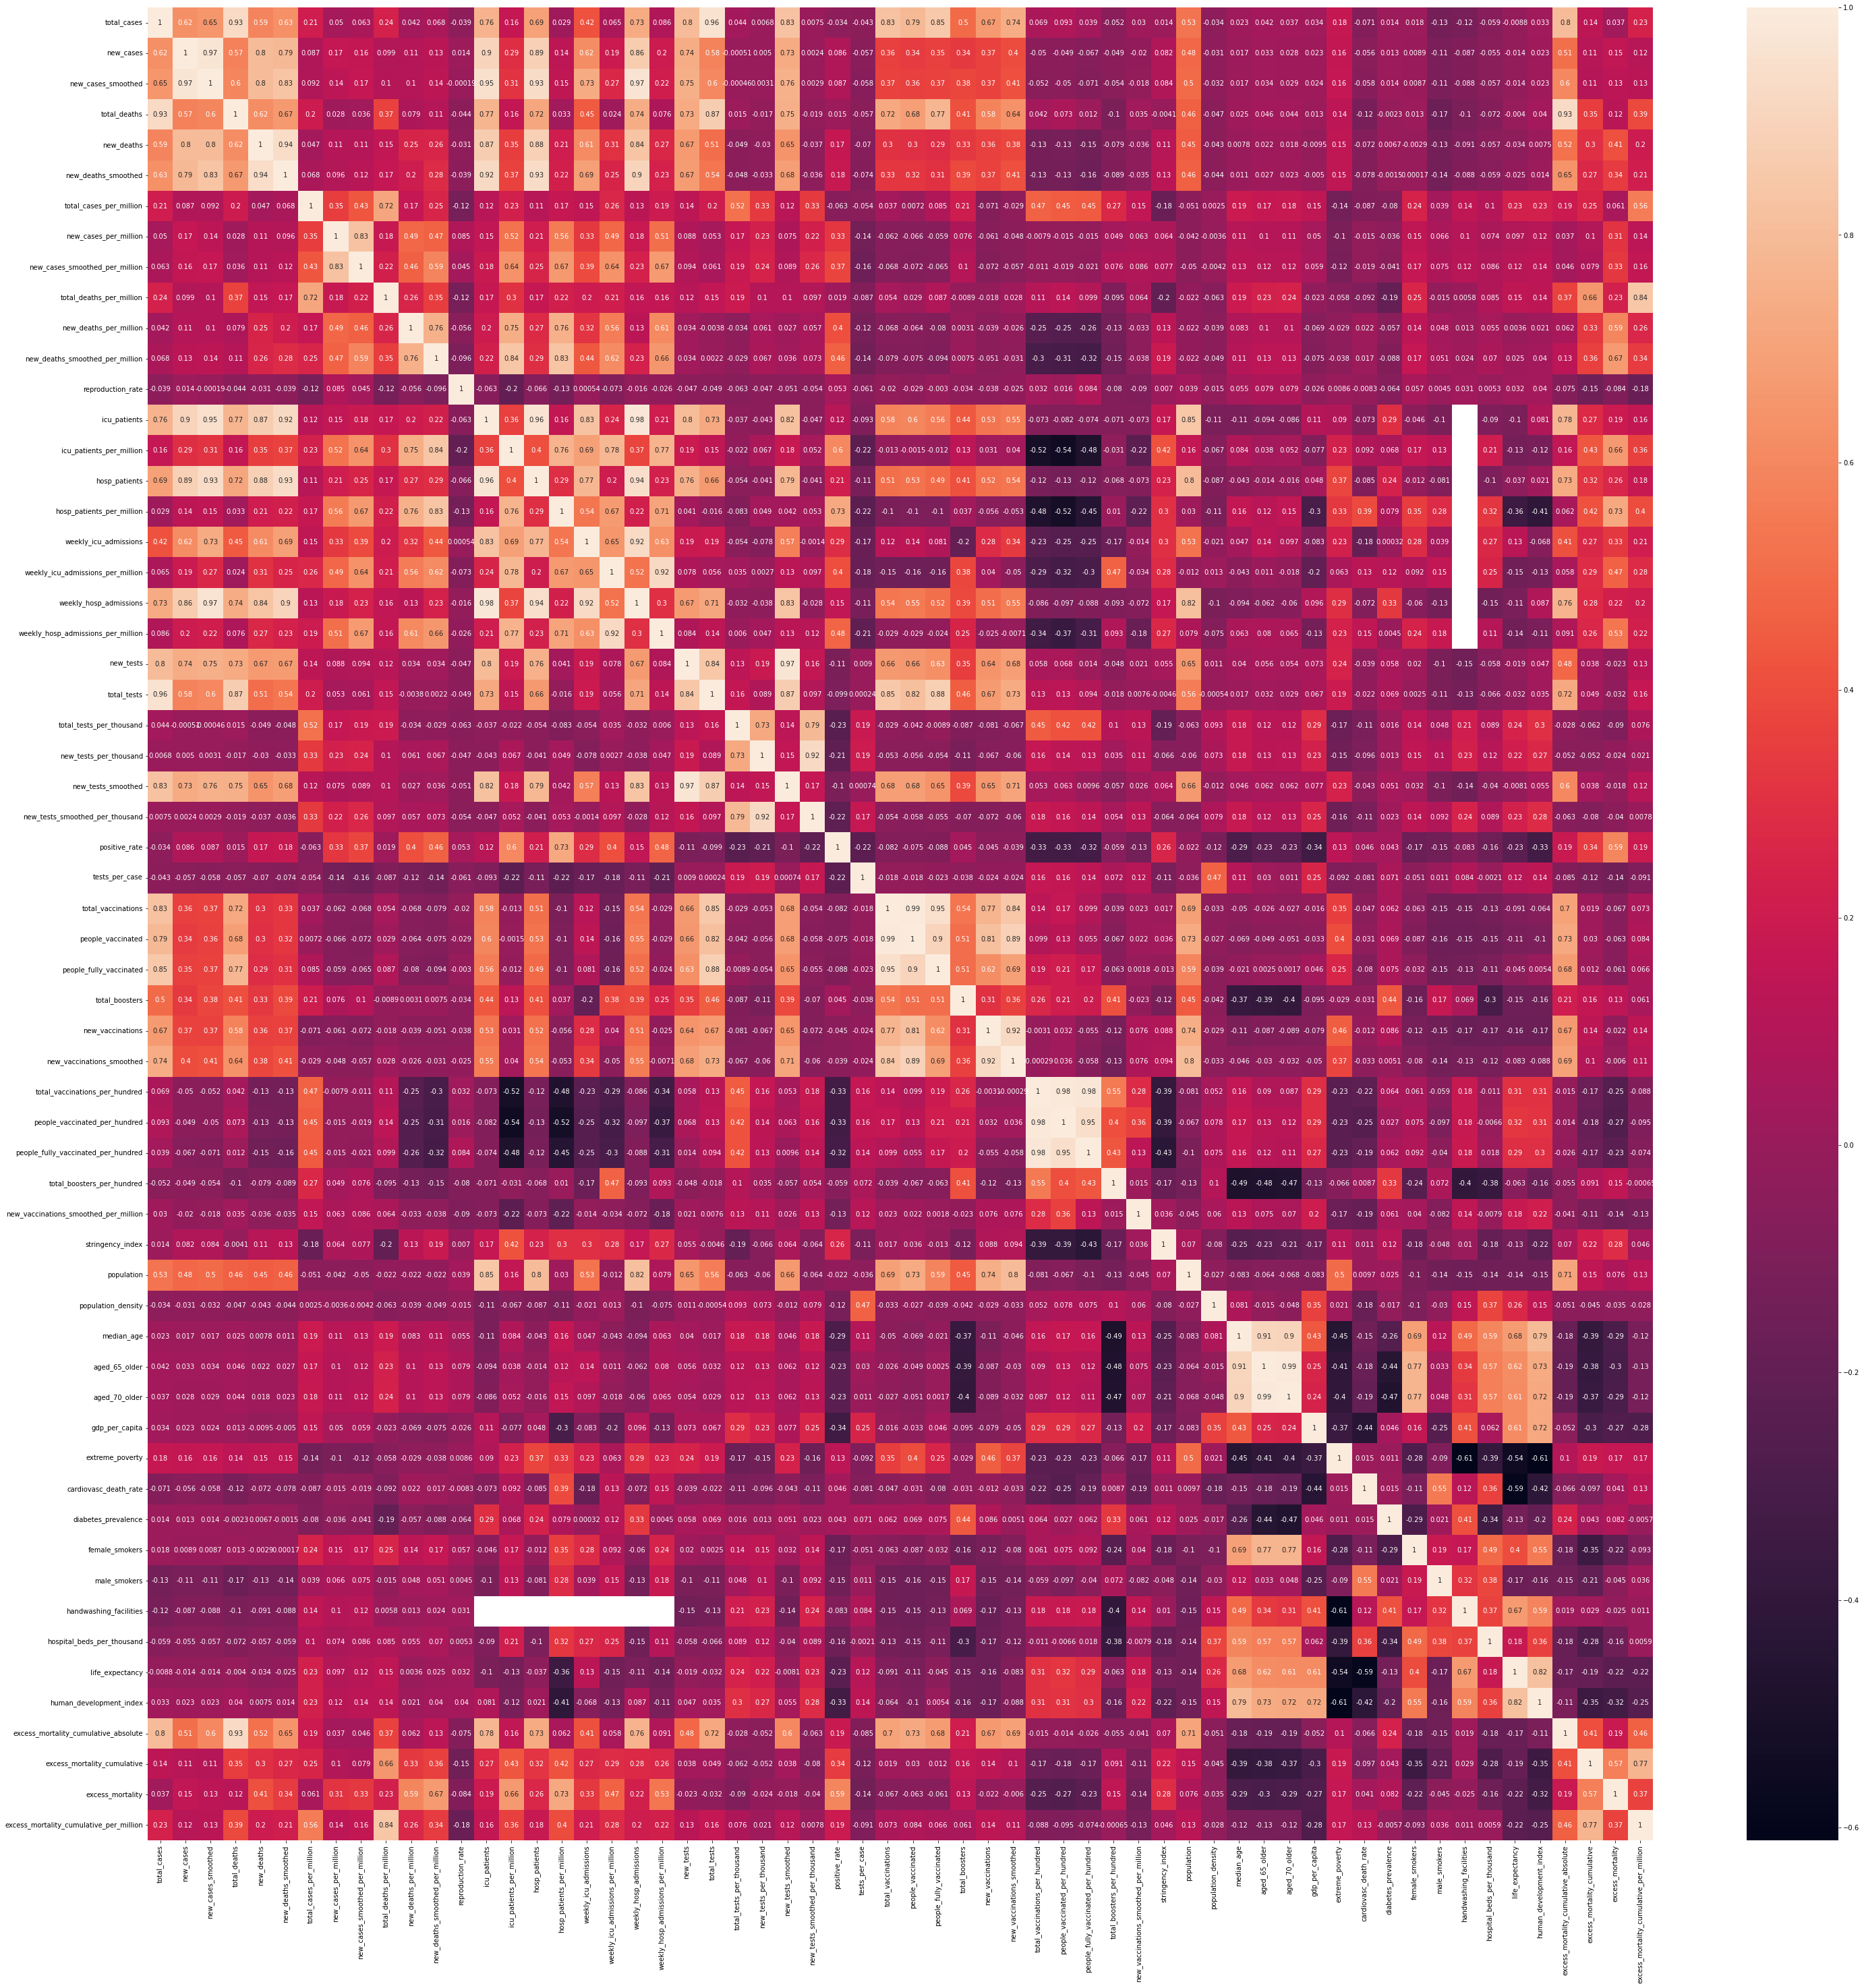

In [423]:
corr = valid_countries_data.corr()
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True)

In [424]:
THRESHOLD_CORRELATION = 0.5
TARGET_VARIABLE = 'new_deaths'

variables_to_drop = []

for variable in valid_countries_data.columns:
    if valid_countries_data[variable].dtype != 'float64':
        continue
    correltation = abs(valid_countries_data[variable].corr(valid_countries_data[TARGET_VARIABLE]))
    if correltation < THRESHOLD_CORRELATION and variable != TARGET_VARIABLE:
        print("{} = {}".format(variable, correltation))
        variables_to_drop.append(variable)

total_cases_per_million = 0.0473952743839364
new_cases_per_million = 0.10650945403999992
new_cases_smoothed_per_million = 0.11077892466512579
total_deaths_per_million = 0.1537338923307614
new_deaths_per_million = 0.24906081678062175
new_deaths_smoothed_per_million = 0.25548965945824553
reproduction_rate = 0.030695999087187568
icu_patients_per_million = 0.35127563920953847
hosp_patients_per_million = 0.21065115799528425
weekly_icu_admissions_per_million = 0.3071157324494144
weekly_hosp_admissions_per_million = 0.2670588133357828
total_tests_per_thousand = 0.04895293587551693
new_tests_per_thousand = 0.03001419853151303
new_tests_smoothed_per_thousand = 0.036714035579238115
positive_rate = 0.17149221137195178
tests_per_case = 0.06999297564963528
total_vaccinations = 0.30432203647994605
people_vaccinated = 0.30116295223428197
people_fully_vaccinated = 0.28866025477281076
total_boosters = 0.32694218915107254
new_vaccinations = 0.3599472555348468
new_vaccinations_smoothed = 0.38158162750510

In [425]:
print("\n")
print("Variables to drop {}".format(variables_to_drop))
print(len(variables_to_drop))
print("\n")



Variables to drop ['total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients_per_million', 'hosp_patients_per_million', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions_per_million', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_

In [426]:
for variable in valid_countries_data.columns:
    if valid_countries_data[variable].dtype != 'float64':
        continue
    if variable not in variables_to_drop:
        correltation = abs(valid_countries_data[variable].corr(valid_countries_data[TARGET_VARIABLE]))
        print("{} = {}".format(variable, correltation))

total_cases = 0.585848792805706
new_cases = 0.801910230311689
new_cases_smoothed = 0.7990680644324424
total_deaths = 0.6213210059115002
new_deaths = 1.0
new_deaths_smoothed = 0.9428418861426563
icu_patients = 0.8704801778389247
hosp_patients = 0.8849841675876732
weekly_icu_admissions = 0.6102248022165475
weekly_hosp_admissions = 0.836089421893032
new_tests = 0.6674371394115965
total_tests = 0.5055531872797232
new_tests_smoothed = 0.6464450792657077
excess_mortality_cumulative_absolute = 0.5211248473838633
